LA4:Data Analytics I

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [2]:
import pandas as pd

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("boston.csv")

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df_x=df.drop(columns=['price'])
print(df_x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [7]:
df_y=df['price']
print(df_y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [8]:
reg=LinearRegression()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.40,random_state=55)

In [10]:
reg.fit(x_train,y_train)

LinearRegression()

In [11]:
print(reg.coef_)

[-1.41431145e-01  5.60828084e-02  6.31663347e-02  3.10167997e+00
 -1.45064461e+01  3.47262240e+00 -7.42377691e-03 -1.48366184e+00
  3.18618436e-01 -1.13773593e-02 -8.43497884e-01  9.26262260e-03
 -5.91591837e-01]


In [12]:
y_pred=reg.predict(x_test) 
print(y_pred)

[23.89443272 19.30694558 23.97979696 27.68900011 24.16352364 22.38204797
 20.14012495 22.68524011 30.3423813  31.35217299 15.10205544 22.32068658
 24.1487608  15.70098222  6.4841714  35.38403891 13.67596932 16.37830613
 24.09074087 21.46870569 26.37127637 20.68747877 19.42802042 13.02046041
 11.75333835 17.75583291 19.81440191 19.33087631 23.66674662 27.20632008
 16.61796566 17.59337516 13.03267438 39.83297164 23.86636457 13.19752448
 22.89369535 10.56456543 14.5981214  27.03798967 24.44447855 38.73377184
 21.21883845 19.20470182 24.80247431 17.97272795 35.49040387 34.12812787
 31.59380973 16.70747019  0.14195538 29.15698657 27.02145868 36.05425288
 22.79393571 31.85411859 32.61355582 23.73030427 28.02671261 26.28195555
 25.38556101 16.8995621  27.95303785 22.71091266 18.41748962 19.08658128
 24.2711268  30.33911744 14.11055647 31.78853449 24.92247917 23.48158303
 11.94885144 31.74807296 37.28054881 35.32240948 19.06999146 12.80857137
 16.95723969 32.39837345 -5.79767018 25.37781299 19

In [13]:
y_pred[0]

23.8944327234805

In [14]:
y_test[0]

24.0

In [15]:
print(mean_squared_error(y_test,y_pred))

22.463618438226288


In [16]:
print(np.mean((y_pred-y_test)**2))

22.463618438226288


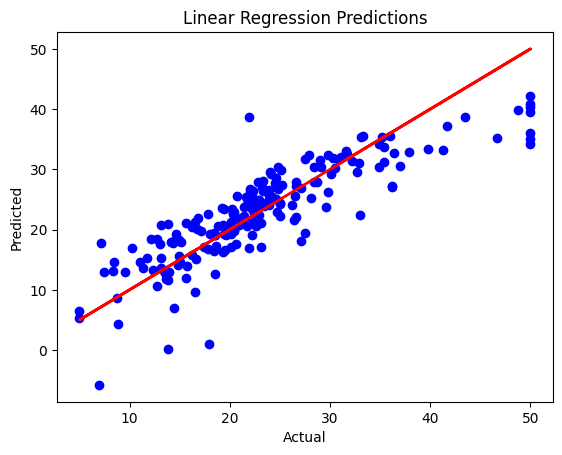

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions')

plt.show()